In [25]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

In [26]:
env_path = 'collectible/Wave'

In [27]:
env = wave.WaveEnv(env_path)

WAVE environment created.


In [29]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 1024
ppo_epochs = 10
clip = 0.2
minibatch_size=256
model = ppo_model.PPO(127, 2, hidden_layer, lr=1e-5, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip)

In [30]:
save_path = f'./results/collectible/PPO_5_EPOCHS_256_MINIBATCH_LR-5'
model.set_model_save_path(save_path)

In [ ]:
model.load_model()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


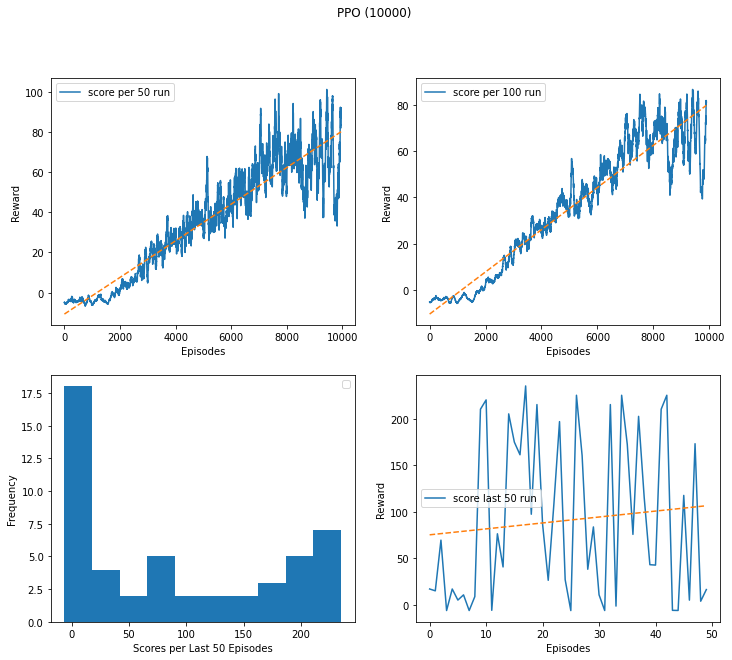

EPOCH: 9999, total reward: 16.319996282458305, timestep: 174, lr: 1e-05


In [31]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 10000, show_plot=True, lr_decay_interval=10000)

In [32]:
model.save_model()

Model saved
Training history saved


In [ ]:
save_path

In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

In [ ]:
import plot
plot.smooth_values(model.train_losses, 100)

In [ ]:
model.plot_train_memory(smooth=100)

In [ ]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

In [ ]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

In [ ]:
env.close()